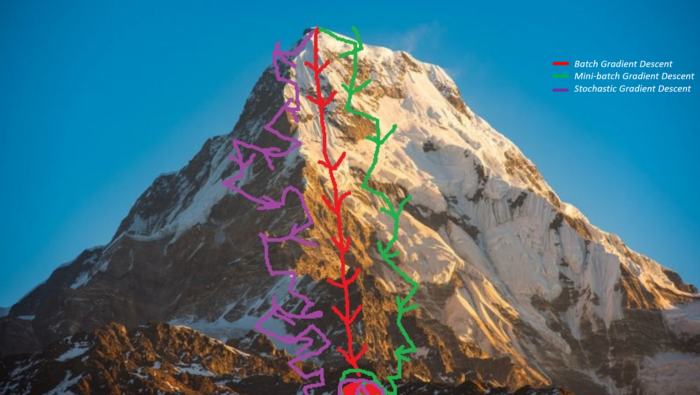

In [ ]:
from PIL import Image
from IPython.core.display import Image, display
display(Image("gradient_descent.png", width=1000, height=1000))

Optimization refers to the task of minimizing/maximizing an objective function f(x) parameterized by x. In machine/deep learning terminology, it’s the task of minimizing the cost/loss function J(w) parameterized by the model’s parameters w ∈ R^d. 

Optimization algorithms (in case of minimization) have one of the following goals:
* Find the global minimum of the objective function. This is feasible if the objective function is convex, i.e. any local minimum is a global minimum.
* Find the lowest possible value of the objective function within its neighborhood. That’s usually the case if the objective function is not convex as the case in most deep learning problems.
There are three kinds of optimization algorithms:
* Optimization algorithm that is not iterative and simply solves for one point.
* Optimization algorithm that is iterative in nature and converges to acceptable solution regardless of the parameters initialization such as gradient descent applied to logistic regression.
* Optimization algorithm that is iterative in nature and applied to a set of problems that have non-convex cost functions such as neural networks. Therefore, parameters’ initialization plays a critical role in speeding up convergence and achieving lower error rates.

## Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

*There is a nice medium blog about the working & different versions of gradient descent algorithm https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3


### Exercise

### Define an array of 2 bit binary table

In [1]:
#create a 2 bit binary table , with all possibilties that can be done with 0 and 1.
import numpy as np
i = [0,1]
#initialsed the array with 0 and 1
#here we get the combinations possible 
bt = np.array([(a,b) for a in i for b in i])
print(bt)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


### Define a variable y conatining the  "or" operation result of x matrix columns

In [3]:
# here we have to apply the OR operation on the array
l = []
#create an empty array in which we will be doing our operations
for j in bt:
  l.append(j[0]|j[1])
y = np.array(l).reshape(-1,1)
print(y)
#this is the result of OR operations

[[0]
 [1]
 [1]
 [1]]


### Define a randomly intialized weight matrix of dimension 3*1

In [4]:
# creating a random matrix of dimensions (3,1)
#again we use random function like we did in 1st notebook
w_m = np.random.randn(3).reshape(3,1)
print(w_m)

[[-2.85995832]
 [-1.2954745 ]
 [ 0.54435183]]


### Define the Learning Rate

In [8]:
#define the learning rate
learning_rate = 0.001

###  Define gradient descent function

In [5]:

def gradient_desc(bt, y, learning_rate, w, epochs):
  cost_history = np.array([])
  y_pred = np.array([])
  for x in range(epochs):
    for i in range(4):
      new = bt[i][0]*w[0] + bt[i][1]*w[1] + w[2]
      y_pred = np.append(y_pred, new )
    y_pred = y_pred.reshape(-1,1)
    cal_cost = np.mean((y - y_pred)**2) 
    f_1 =0
    f_2 =0
    for i in range(4):
      f_1 += bt[i][0] * (y[i]-y_pred[i])
    for i in range(4):
      f_2 += bt[i][1] * (y[i]-y_pred[i])
    f_1 = (-2*f_1)/4
    f_2 = (-2*f_2)/4
    w[:2] = w[:2]- (learning_rate* np.array([f_1, f_2]))
    dc = -2*np.mean(y-y_pred)
    w[2] = w[2] - learning_rate*dc
    cost_history = np.append(cost_history, cal_cost)
    if x != epochs-1 :
      y_pred = np.array([])
  return cost_history, y_pred, w

### Plot the Cost function

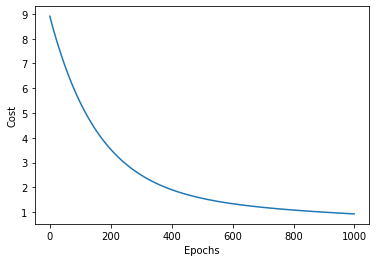

In [9]:
import matplotlib.pyplot as plt
#epochs-all training examples
#The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
epochs = 1000
cost_h, w_h, w = gradient_desc(bt, y, learning_rate, w_m, epochs)
plt.plot(range(epochs), cost_h)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### plot prediction vs target

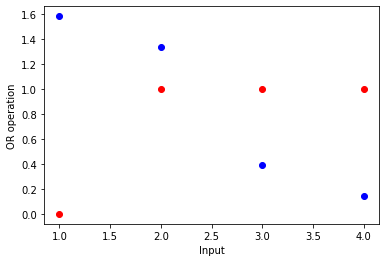

In [10]:
#here we simply use scatter to make graphs
plt.scatter(range(1,5), y, c="red")
plt.scatter(range(1,5), w_h, c="blue")
plt.xlabel("Input")
plt.ylabel("OR operation")
plt.show()